In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Lição 6


Aluno: Beatriz Vieira Nascimento

Github: Beatrizvn


Primeiro vou construir e treinar um modelo de aprendizado profundo "do zero" - o que significa que não vou usar nenhuma arquitetura pré-construída, otimizadores, estruturas de carregamento de dados, etc.
Depois usarei o Random Forest para treinar o mesmo dataset. Random Forest é um algoritmo de aprendizado supervisionado que cria uma série de árvores de decisão e, em seguida, combina suas previsões para obter uma predição final mais precisa.

## O dataset

Usaremos o dataset wine quality, disponivel no kaggle.

Para isso precisamos adiciona-lo ao nosso projeto.

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Analisando nosso dataset e fazendo ajustes

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Como podemos observar o conjunto de dados inclui 1599 linhas e 12 colunas

In [4]:
pd.options.display.max_columns = df.shape[1]
df.describe(include=[np.number])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Acima podemos observar as estatísticas que fornecem um resumo sobre a tendência central, variabilidade e distribuição dos dados numéricos do nosso dado. 

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

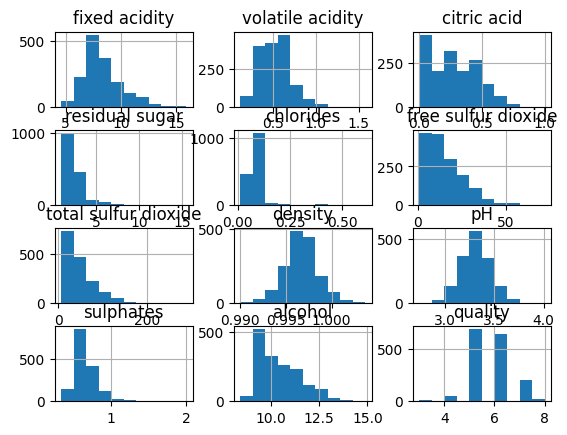

In [5]:
df.hist()

In [6]:
np.log(10000)

9.210340371976182

In [7]:
columns_to_transform = ['total sulfur dioxide', 'free sulfur dioxide','residual sugar']
df_with_logs = df.copy()
for column_to_transform in columns_to_transform:
    new_column_log = 'log_'+column_to_transform
    df_with_logs[new_column_log] = np.log(df[column_to_transform]+1)
    df_with_logs = df_with_logs.drop([column_to_transform], axis=1)
df_with_logs.describe(include=[np.number])

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality,log_total sulfur dioxide,log_free sulfur dioxide,log_residual sugar
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,0.996747,3.311113,0.658149,10.422983,5.636023,3.634750,2.639013,1.218131
std,1.741096,0.179060,0.194801,0.047065,0.001887,0.154386,0.169507,1.065668,0.807569,0.682575,0.623790,0.269969
min,4.600000,0.120000,0.000000,0.012000,0.990070,2.740000,0.330000,8.400000,3.000000,1.945910,0.693147,0.641854
25%,7.100000,0.390000,0.090000,0.070000,0.995600,3.210000,0.550000,9.500000,5.000000,3.135494,2.079442,1.064711
50%,7.900000,0.520000,0.260000,0.079000,0.996750,3.310000,0.620000,10.200000,6.000000,3.663562,2.708050,1.163151
75%,9.200000,0.640000,0.420000,0.090000,0.997835,3.400000,0.730000,11.100000,6.000000,4.143135,3.091042,1.280934
max,15.900000,1.580000,1.000000,0.611000,1.003690,4.010000,2.000000,14.900000,8.000000,5.669881,4.290459,2.803360


### Coluna 'quality'
Olhando para nossa coluna 'quality', podemos observar que maior parte dos vinhos são classificados acima em 6 e 5

<Axes: xlabel='quality'>

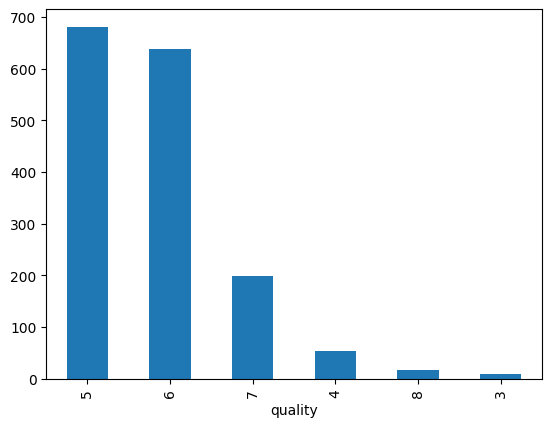

In [8]:
df_with_logs['quality'].value_counts().plot.bar()

In [9]:
quality = 100 * (df_with_logs['quality'].value_counts() / len(df.index))
quality

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: count, dtype: float64

Na documentação do nosso [dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/) é dito que pode ser interessante a fazer definir um ponto de corte arbitrário para sua variável dependente (qualidade do vinho).

Então faremos o seguinte:

- quality > 5 = "bom" -> 1
- quality <= 5 = "ruim" -> 0

Sera criado uma nova coluna chamada 'quality_bg' e excluiremos a 'quality'.



In [10]:
# Funnção para transformar os valores
def transforma_nota(nota):
    if nota > 5:
        return 1
    else:
        return 0

# Apliquando a função à coluna 'quality' e para criar uma nova coluna 'quality_bg'
df_with_logs['quality_bg'] = df_with_logs['quality'].apply(transforma_nota)

# Descartando a coluna quality
df_with_logs.drop('quality', axis=1, inplace=True)

df_with_logs.to_csv('dados_transformados.csv', index=False)

In [11]:
df_with_logs.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'density', 'pH', 'sulphates', 'alcohol', 'log_total sulfur dioxide',
       'log_free sulfur dioxide', 'log_residual sugar', 'quality_bg'],
      dtype='object')

<Axes: xlabel='quality_bg'>

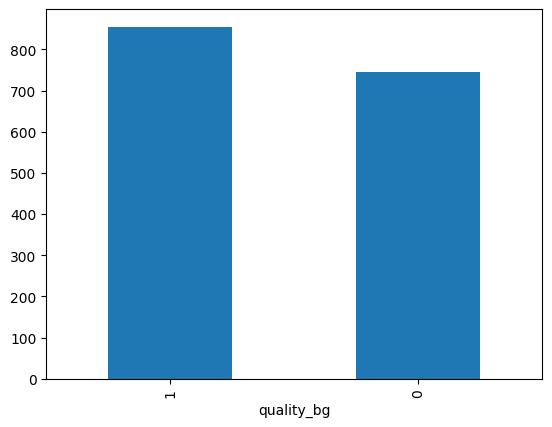

In [12]:
df_with_logs['quality_bg'].value_counts().plot.bar()

Outro passo importante é retirarmos valores nulos do nossos dados. Abaixo podemos ver que não existem valores nulos.

In [13]:
df_with_logs.isna().sum()

fixed acidity               0
volatile acidity            0
citric acid                 0
chlorides                   0
density                     0
pH                          0
sulphates                   0
alcohol                     0
log_total sulfur dioxide    0
log_free sulfur dioxide     0
log_residual sugar          0
quality_bg                  0
dtype: int64

## Modelo Linear 

In [14]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 
           'density', 'pH', 'sulphates', 'alcohol', 
           'log_total sulfur dioxide', 'log_free sulfur dioxide', 'log_residual sugar']

Faremos manualmente uma etapa para calcular previsões e erros para cada linha dos nossos dados.

Nosso primeiro modelo será bem simples, usando uma fórmula linear. Para isso, escolheremos números aleatórios para os coeficientes necessários, e ajustaremos nossa semente manualmente para garantir consistência nas explicações.

In [15]:
from torch import tensor
t_dep = tensor(df_with_logs.quality_bg)
t_indep = tensor(df_with_logs[columns].values, dtype=torch.float)
t_indep

tensor([[7.4000, 0.7000, 0.0000,  ..., 3.5553, 2.4849, 1.0647],
        [7.8000, 0.8800, 0.0000,  ..., 4.2195, 3.2581, 1.2809],
        [7.8000, 0.7600, 0.0400,  ..., 4.0073, 2.7726, 1.1939],
        ...,
        [6.3000, 0.5100, 0.1300,  ..., 3.7136, 3.4012, 1.1939],
        [5.9000, 0.6450, 0.1200,  ..., 3.8067, 3.4965, 1.0986],
        [6.0000, 0.3100, 0.4700,  ..., 3.7612, 2.9444, 1.5261]])

In [16]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103])

Nossas previsões serão calculadas multiplicando cada linha pelos coeficientes e somando os resultados. 

In [17]:
t_indep*coeffs

tensor([[-3.4255,  0.0970,  0.0000,  ...,  0.9951, -1.0913,  0.2239],
        [-3.6106,  0.1219,  0.0000,  ...,  1.1810, -1.4308,  0.2694],
        [-3.6106,  0.1053,  0.0096,  ...,  1.1216, -1.2176,  0.2511],
        ...,
        [-2.9163,  0.0707,  0.0313,  ...,  1.0394, -1.4937,  0.2511],
        [-2.7311,  0.0894,  0.0289,  ...,  1.0654, -1.5355,  0.2310],
        [-2.7774,  0.0430,  0.1132,  ...,  1.0527, -1.2931,  0.3209]])

Vamos fazer com que todas as colunas contenham números de 0 a 1, dividindo cada coluna pelo seu max():

Isso é para evitar a dominancia de alguma coluna.

In [18]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [19]:
t_indep*coeffs

tensor([[-0.2154,  0.0614,  0.0000,  ...,  0.1755, -0.2543,  0.0799],
        [-0.2271,  0.0772,  0.0000,  ...,  0.2083, -0.3335,  0.0961],
        [-0.2271,  0.0667,  0.0096,  ...,  0.1978, -0.2838,  0.0896],
        ...,
        [-0.1834,  0.0447,  0.0313,  ...,  0.1833, -0.3481,  0.0896],
        [-0.1718,  0.0566,  0.0289,  ...,  0.1879, -0.3579,  0.0824],
        [-0.1747,  0.0272,  0.1132,  ...,  0.1857, -0.3014,  0.1145]])

In [20]:
preds = (t_indep*coeffs).sum(axis=1)

In [21]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.8386)

In [22]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

### Realizando a etapa de gradient descent

Vamos realizar manualmente uma única "época" de descida de gradiente. Vamos automatizar o cálculo dos gradientes.

In [23]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103], requires_grad=True)

Agora, ao calcularmos nosso loss, o PyTorch acompanhará todas as etapas, então poderemos obter os gradientes depois:

In [24]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.8386, grad_fn=<MeanBackward0>)

`backward()`  do PyTorch para calcular os gradientes agora:

In [25]:
loss.backward()

In [26]:
coeffs.grad

tensor([-0.5221, -0.3334, -0.2702, -0.1428, -0.9906, -0.8238, -0.3275, -0.6977,
        -0.6389, -0.6136, -0.4329])

In [27]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-1.0442, -0.6668, -0.5404, -0.2856, -1.9812, -1.6475, -0.6550, -1.3955,
        -1.2779, -1.2273, -0.8657])

In [28]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4644)


### Treinando o modelo linear

`RandomSplitter` para obter índices que dividirão nossos dados em conjuntos de treinamento e validação:

In [29]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [30]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(1280, 319)

Vou criar funções para as três coisas: atualizar `coeffs`, realizar uma etapa completa de descida de gradiente e inicializar `coeffs` com números aleatórios:

In [31]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [32]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [33]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [34]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [35]:
coeffs = train_model(18, lr=0.2)

0.830; 0.487; 0.485; 0.482; 0.479; 0.476; 0.473; 0.471; 0.469; 0.467; 0.466; 0.464; 0.463; 0.462; 0.462; 0.461; 0.460; 0.460; 

In [36]:
# coeficientes de cada coluna:
def show_coeffs(): return dict(zip(columns, coeffs.requires_grad_(False)))
show_coeffs()

{'fixed acidity': tensor(-0.2832),
 'volatile acidity': tensor(0.1102),
 'citric acid': tensor(0.4022),
 'chlorides': tensor(-0.2131),
 'density': tensor(0.0276),
 'pH': tensor(-0.0691),
 'sulphates': tensor(0.6378),
 'alcohol': tensor(0.6162),
 'log_total sulfur dioxide': tensor(0.3839),
 'log_free sulfur dioxide': tensor(-0.2804),
 'log_residual sugar': tensor(0.3171)}

### Accuracy

Calculo das previsões:

In [37]:
preds = calc_preds(coeffs, val_indep)

In [38]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True, False, False, False,  True, False, False, False, False,
        False,  True,  True, False,  True, False])

Vamos ver qual é a nossa precisão média:

In [39]:
results.float().mean()

tensor(0.5737)

In [40]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.5737)

## A neural network

Agora temos o que precisamos para implementar nossa rede neural.

Primeiro, precisaremos criar coeficientes para cada uma de nossas camadas. Nosso primeiro conjunto de coeficientes pegará nossas `n_coeff` entradas e criará `n_hidden` saídas. Podemos escolher qualquer valor para `n_hidden` que quisermos - um número maior dá mais flexibilidade à nossa rede, mas a torna mais lenta e mais difícil de treinar. Portanto, precisamos de uma matriz de tamanho `n_coeff` por `n_hidden`. Vamos dividir esses coeficientes por `n_hidden` para que, quando os somarmos na próxima camada, acabemos com números de magnitude semelhante aos que começamos.

Então, nossa segunda camada precisará pegar as `n_hidden` entradas e criar uma única saída, o que significa que precisamos de uma matriz de `n_hidden` por `1`. A segunda camada também precisará de um termo constante adicionado.

In [41]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

Agora que temos nossos coeficientes, podemos criar nossa rede neural. As etapas-chave são os dois produtos de matrizes, `indeps@l1` e `res@l2` (onde `res` é a saída da primeira camada). A saída da primeira camada é passada para `F.relu` (essa é a nossa não linearidade), e a segunda é passada para `torch.sigmoid` como antes.

In [42]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

Agora que temos mais de um conjunto de coeficientes, precisamos adicionar um loop para atualizar cada um deles:

In [43]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

Vamos treinar nosso modelo agora


In [44]:
coeffs = train_model(lr=1.4)

0.489; 0.489; 0.488; 0.488; 0.487; 0.487; 0.486; 0.486; 0.485; 0.485; 0.485; 0.484; 0.484; 0.484; 0.483; 0.483; 0.483; 0.482; 0.482; 0.482; 0.482; 0.481; 0.481; 0.481; 0.481; 0.480; 0.480; 0.480; 0.480; 0.480; 

In [45]:
coeffs = train_model(lr=20)

0.489; 0.483; 0.480; 0.478; 0.477; 0.476; 0.476; 0.476; 0.476; 0.476; 0.476; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 0.475; 

Vamos ver nosso resultado no conjunto de validação:

In [46]:
acc(coeffs)

tensor(0.5737)

# Criando o modelo com RandomForestRegressor()

### Criando os dados de treinamente e teste

<Axes: xlabel='quality_bg'>

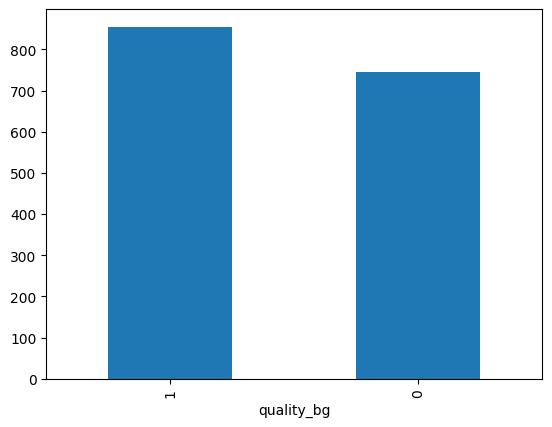

In [47]:
df_with_logs['quality_bg'].value_counts().plot.bar()

In [48]:
X = df_with_logs.drop(columns='quality_bg')
y = df_with_logs['quality_bg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### RamdomForestClassifier

O Random Forest é um algoritmo de aprendizado supervisionado que cria uma série de árvores de decisão e, em seguida, combina suas previsões para obter uma predição final mais precisa.

Arvore de decisão: Uma árvore de decisão é um modelo de aprendizado de máquina que é usado para fazer previsões em problemas de classificação ou regressão. Ela funciona criando uma série de perguntas lógicas sobre os dados de entrada, onde cada pergunta é representada por um nó na árvore. A árvore é construída a partir da raiz, onde cada pergunta é feita até chegar a uma folha, que representa a previsão final.

A função `RandomForestClassifier` cria um modelo de classificação usando o algoritmo de Floresta Aleatória.

- `n_estimators`: O primeiro argumento representa o número de árvores na floresta. A floresta aleatória cria múltiplas árvores de decisão durante o treinamento e a saída da floresta é a média das previsões das árvores individuais (regressão) ou a classe que a maioria das árvores previu (classificação).

- `min_samples_leaf`: Este é um parâmetro que controla o número mínimo de amostras necessárias para formar uma folha em uma árvore. O valor padrão é 1, o que significa que uma folha pode ter apenas uma amostra. No seu caso indica que uma folha deve ter pelo menos 5 amostras para ser criada.

Esses parâmetros ajudam a controlar a complexidade do modelo e a evitar overfitting. Aumentar o número de árvores na floresta geralmente torna o modelo mais robusto, enquanto aumentar `min_samples_leaf` pode impedir que as árvores se ajustem demais aos dados de treinamento.

In [49]:
model = RandomForestClassifier(100, min_samples_leaf=3)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3)

In [50]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

### Erro Médio Absoluto:

In [51]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.5f} // {mae*100:.1f}%')

Mean Absolute Error: 0.19750 // 19.8%


# Salvando o modelo e colocando no huggingface

In [52]:
import pickle

# Carregar o modelo treinado
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

Acesse no [huggingFace](https://huggingface.co/spaces/fastaioncampus/Wine-Quality)

## Referencias

[FastAI - From-scratch model](https://course.fast.ai/Lessons/lesson5.html)


[FastAI - 6: Random Forest](https://course.fast.ai/Lessons/lesson6.html)